In [2]:
import sys
sys.path.append("../")
from importlib import reload
import mypackage.modelo
import mypackage.grafico

reload(mypackage)
reload(mypackage.modelo)
reload(mypackage.grafico)

<module 'mypackage.grafico' from 'c:\\Users\\shiku\\Documents\\IABD\\PIA\\redes_neuronales\\tema4\\..\\mypackage\\grafico.py'>

In [3]:

from mypackage.modelo import *
from mypackage.grafico import customize_graf,save_figure

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import math
import random
from tabulate import tabulate

In [4]:
def get_datos():
    gasto_educacion=np.array([ 2.01666708,  4.79734083,  9.23784581, 14.11529384, 14.92688637,
       17.34408196, 17.62435324, 22.41875021, 25.3139145 , 34.85886672,
       38.87476262, 42.01380169, 46.63551059, 49.58578273, 50.18371003,
       52.06630172, 54.68810274, 57.13046193, 66.35609935, 69.05499042,
       69.51252436, 69.83788756, 79.76649746, 81.83730552, 87.09879038,
       89.00469759, 93.17139213, 93.66070686, 94.1944751 , 97.36920633])
    pib=np.array([ 56.18031474,  47.18848199,  57.68974048,  43.70348368,
        59.10244323,  65.96080804,  45.74334603,  13.575581  ,
        68.43756969, 147.15375307,  25.39687009,  74.39010069,
        98.93395801, 116.07013679, 138.55546747, 139.36601894,
       150.09622546, 156.14375739, 119.75844452, 139.08155228,
       128.72247348, 152.65110462, 148.23106977, 137.86314926,
       217.28932067, 168.64994509, 163.10598352, 200.47638924,
       150.44019156, 173.2055957 ])
    datos=np.column_stack((gasto_educacion,pib))
    return datos

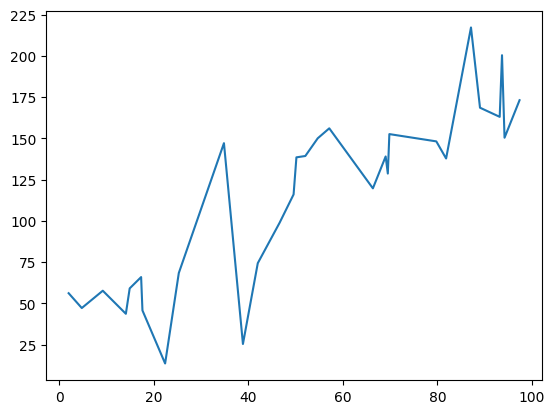

In [5]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
datos=get_datos()
x=datos[:,0]
y=datos[:,1]
figure=plt.figure()
axes = figure.add_subplot(1,1,1)
#axes.plot(x,y, label='datos1', color='red')
axes.plot(x,y)
#np.linspace(30, 150, 100)
#customize_graf(axes=axes,title='Gasto en educacion en paises de la OCDE', xlabel='Gastos en educacion(Miles de millones)', ylabel='PIB(Miles de millones)')


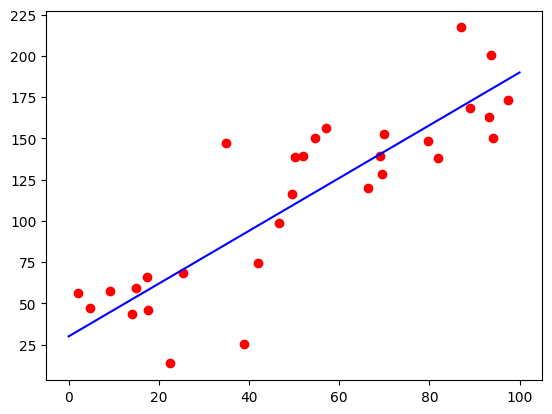

In [6]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
datos=get_datos()
x=datos[:,0]
y=datos[:,1]
a=1.6
b=40

gasto=np.linspace(0, 100, 100)
pib=a*gasto+30
figure=plt.figure()
axes = figure.add_subplot(1,1,1)
axes.scatter(x,y, label='pib real', color='red')
axes.plot(gasto,pib, label='pib predicho', color='blue')
#customize_graf(axes=axes,title='Gasto en educacion en paises de la OCDE', xlabel='Gastos en educacion(Miles de millones)', ylabel='PIB(Miles de millones)')


In [7]:
from tabulate import tabulate
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_iris
from matplotlib.colors import LightSource
import random

def compile_fit_4(x,y,epochs):
    np.random.seed(5)
    tf.random.set_seed(5)
    random.seed(5)  
     
    model=Sequential()
    model.add(Dense(1,input_dim=1))
    model.compile(loss='mean_squared_error')
     
     
    history=model.fit(x, y,verbose=False,epochs=epochs) 
 
    return model,history

c:\Users\shiku\Documents\IABD\PIA\redes_neuronales\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1.042852
0.20774877
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


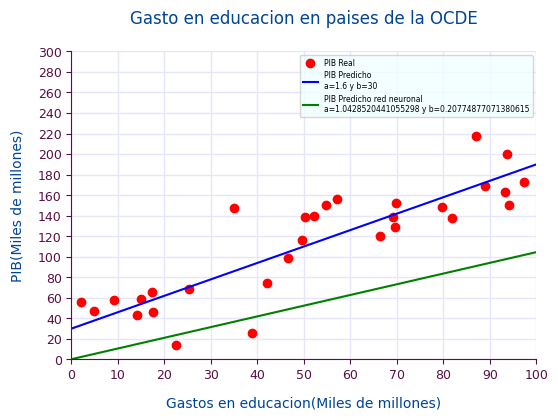

In [8]:
model,history=compile_fit_4(x,y,200)

a_pred=model.layers[0].get_weights()[0][0,0]
b_pred=model.layers[0].get_weights()[1][0]

print(a_pred)
print(b_pred)

a_modelo_correcto=1.6
b_modelo_correcto=30

rango_gasto_edu=np.linspace(0, 100, 50)
pib_modelo_correcto=a_modelo_correcto*rango_gasto_edu+b_modelo_correcto

#Predict
pib_modelo_red_neuronal=model.predict(rango_gasto_edu.reshape(-1,1))

figure=plt.figure(figsize=(6,4))
axes=figure.add_subplot(1,1,1)
axes.scatter(x,y, label='PIB Real', color='red')
axes.plot(rango_gasto_edu,pib_modelo_correcto, label=f'PIB Predicho\na={a_modelo_correcto} y b={b_modelo_correcto}', color='blue')
#resultado de red neuronal
axes.plot(rango_gasto_edu,pib_modelo_red_neuronal, label=f'PIB Predicho red neuronal\na={a_pred} y b={b_pred}', color='green')
customize_graf(axes=axes,title='Gasto en educacion en paises de la OCDE', xlabel='Gastos en educacion(Miles de millones)', ylabel='PIB(Miles de millones)', frontsize=9,xmajor_locator=10, ymajor_locator=20, xmax=100, ymax=300)


1.6466662
26.974415
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


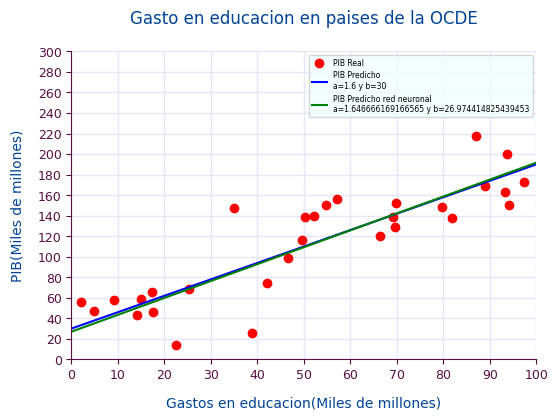

In [9]:
model, history=compile_fit_4(x,y,27000)

a_pred=model.layers[0].get_weights()[0][0,0]
b_pred=model.layers[0].get_weights()[1][0]

print(a_pred)
print(b_pred)

a_modelo_correcto=1.6
b_modelo_correcto=30

rango_gasto_edu=np.linspace(0, 100, 50)
pib_modelo_correcto=a_modelo_correcto*rango_gasto_edu+b_modelo_correcto

#Predict
pib_modelo_red_neuronal=model.predict(rango_gasto_edu.reshape(-1,1))

figure=plt.figure(figsize=(6,4))
axes=figure.add_subplot(1,1,1)
axes.scatter(x,y, label='PIB Real', color='red')
axes.plot(rango_gasto_edu,pib_modelo_correcto, label=f'PIB Predicho\na={a_modelo_correcto} y b={b_modelo_correcto}', color='blue')
#resultado de red neuronal
axes.plot(rango_gasto_edu,pib_modelo_red_neuronal, label=f'PIB Predicho red neuronal\na={a_pred} y b={b_pred}', color='green')
customize_graf(axes=axes,title='Gasto en educacion en paises de la OCDE', xlabel='Gastos en educacion(Miles de millones)', ylabel='PIB(Miles de millones)', frontsize=9,xmajor_locator=10, ymajor_locator=20, xmax=100, ymax=300)


In [10]:
loss=history.history['loss']
ult_loss=loss[-1]
print(loss)
a_loss=np.array(loss)
x_loss=a_loss.reshape(-1,1)

[6133.890625, 6106.52978515625, 6086.7490234375, 6070.2294921875, 6055.5947265625, 6042.20849609375, 6029.7158203125, 6017.8935546875, 6006.595703125, 5995.71728515625, 5985.18017578125, 5974.9287109375, 5964.9150390625, 5955.10498046875, 5945.46923828125, 5935.984375, 5926.62939453125, 5917.38916015625, 5908.25048828125, 5899.2001953125, 5890.22998046875, 5881.330078125, 5872.49267578125, 5863.71240234375, 5854.9833984375, 5846.2998046875, 5837.658203125, 5829.05517578125, 5820.48583984375, 5811.9482421875, 5803.43994140625, 5794.95947265625, 5786.50146484375, 5778.06884765625, 5769.6552734375, 5761.2626953125, 5752.8876953125, 5744.53076171875, 5736.189453125, 5727.86376953125, 5719.55224609375, 5711.2548828125, 5702.970703125, 5694.6982421875, 5686.4384765625, 5678.189453125, 5669.95263671875, 5661.72607421875, 5653.5087890625, 5645.302734375, 5637.10595703125, 5628.9189453125, 5620.740234375, 5612.5712890625, 5604.4111328125, 5596.25927734375, 5588.11669921875, 5579.98193359375, 55

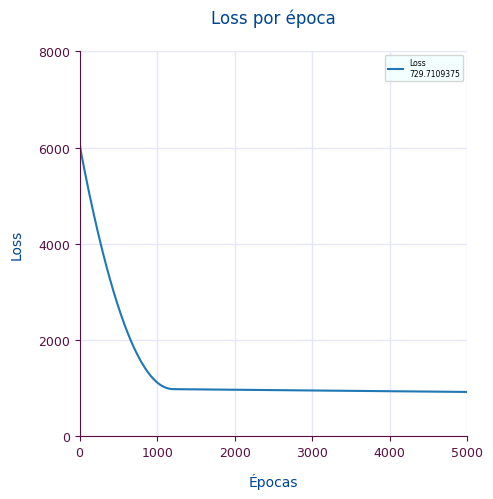

In [11]:
fig_loss=plt.figure(figsize=(5,5))
axes_loss=fig_loss.add_subplot(1,1,1)
axes_loss.plot(x_loss, label=f'Loss\n{ult_loss}')
customize_graf(axes=axes_loss,title='Loss por época', xlabel='Épocas', ylabel='Loss', frontsize=9,xmajor_locator=1000, ymajor_locator=2000, xmax=5000, ymax=8000)


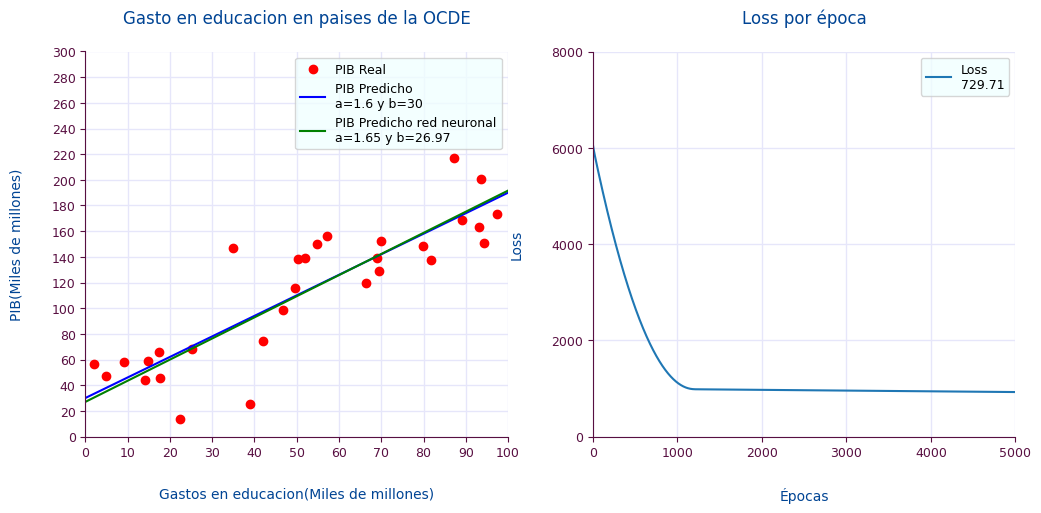

In [13]:
fig_8=plt.figure(figsize=(12,5))
axes_8=fig_8.add_subplot(1,2,1)
axes_8.scatter(x,y, label='PIB Real', color='red')
axes_8.plot(rango_gasto_edu,pib_modelo_correcto, label=f'PIB Predicho\na={a_modelo_correcto} y b={b_modelo_correcto}', color='blue')
#resultado de red neuronal
axes_8.plot(rango_gasto_edu,pib_modelo_red_neuronal, label=f'PIB Predicho red neuronal\na={a_pred:.2f} y b={b_pred:.2f}', color='green')
customize_graf(axes=axes_8,title='Gasto en educacion en paises de la OCDE', xlabel='Gastos en educacion(Miles de millones)', ylabel='PIB(Miles de millones)', frontsize=9,xmajor_locator=10, ymajor_locator=20, xmax=100, ymax=300)

axes_8=fig_8.add_subplot(1,2,2)
axes_8.plot(x_loss, label=f'Loss\n{ult_loss:.2f}')
customize_graf(axes=axes_8,title='Loss por época', xlabel='Épocas', ylabel='Loss', frontsize=9,xmajor_locator=1000, ymajor_locator=2000, xmax=5000, ymax=8000)


In [14]:
def compile_fit_4_2(x,y,epochs):
    np.random.seed(5)
    tf.random.set_seed(5)
    random.seed(5)  
     
    model=Sequential()
    model.add(Dense(1,activation="relu",input_dim=1))
    model.add(Dense(10,activation="relu"))
    model.add(Dense(100,activation="relu"))
    model.add(Dense(300,activation="relu"))
    model.add(Dense(600,activation="relu"))
    model.add(Dense(900,activation="relu"))
    model.add(Dense(1800,activation="relu"))
    model.add(Dense(900,activation="relu"))   
    model.add(Dense(600,activation="relu"))        
    model.add(Dense(300,activation="relu"))        
    model.add(Dense(200,activation="relu"))
    model.add(Dense(100,activation="relu"))                    
    model.add(Dense(10,activation="relu"))                        
    model.add(Dense(1,input_dim=1))                        
    model.compile(loss='mean_squared_error',optimizer="Adam")
     
     
    history=model.fit(x, y,verbose=False, epochs=epochs) 
 
    return model,history

c:\Users\shiku\Documents\IABD\PIA\redes_neuronales\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


0.73789406
-0.12232555
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001EFD1049580> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


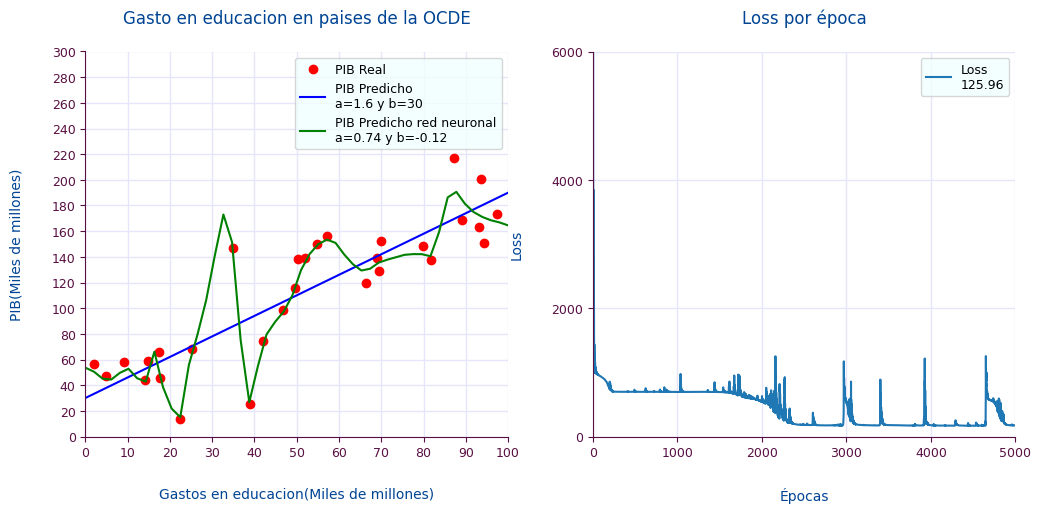

In [15]:
model, history=compile_fit_4_2(x,y,10000)

a_pred=model.layers[0].get_weights()[0][0,0]
b_pred=model.layers[0].get_weights()[1][0]

print(a_pred)
print(b_pred)

loss=history.history['loss']
ult_loss=loss[-1]
a_loss=np.array(loss)
x_loss=a_loss.reshape(-1,1)

rango_gasto_edu=np.linspace(0, 100, 50)
pib_modelo_correcto=a_modelo_correcto*rango_gasto_edu+b_modelo_correcto

#Predict
pib_modelo_red_neuronal=model.predict(rango_gasto_edu.reshape(-1,1))

fig_8=plt.figure(figsize=(12,5))
axes_8=fig_8.add_subplot(1,2,1)
axes_8.scatter(x,y, label='PIB Real', color='red')
axes_8.plot(rango_gasto_edu,pib_modelo_correcto, label=f'PIB Predicho\na={a_modelo_correcto} y b={b_modelo_correcto}', color='blue')
#resultado de red neuronal
axes_8.plot(rango_gasto_edu,pib_modelo_red_neuronal, label=f'PIB Predicho red neuronal\na={a_pred:.2f} y b={b_pred:.2f}', color='green')
customize_graf(axes=axes_8,title='Gasto en educacion en paises de la OCDE', xlabel='Gastos en educacion(Miles de millones)', ylabel='PIB(Miles de millones)', frontsize=9,xmajor_locator=10, ymajor_locator=20, xmax=100, ymax=300)

axes_8=fig_8.add_subplot(1,2,2)
axes_8.plot(x_loss, label=f'Loss\n{ult_loss:.2f}')
customize_graf(axes=axes_8,title='Loss por época', xlabel='Épocas', ylabel='Loss', frontsize=9,xmajor_locator=1000, ymajor_locator=2000, xmax=5000, ymax=6000)


In [16]:
def get_datos_validacion():
    datos_validacion=np.array(
        [[  1.22140488 , 59.35315077] , [  2.42834632 ,  3.50613409] , [  4.27529991 , 70.39938914] ,
        [ 14.44651349 , 50.0606769 ] , [ 16.10795855 , 81.08562061] , [ 16.75024181 , 33.95365822] ,
        [ 26.80487149 , 47.1495392 ] , [ 28.81517859 ,106.34919698] , [ 48.56698654 ,120.25398606] ,
        [ 52.08015067 ,116.7993955 ] , [ 53.30646055 ,131.30936472] , [ 55.09968806 ,131.34281752] ,
        [ 60.39615207 , 97.77483743] , [ 73.52487026 , 92.30645543] , [ 76.2771471  ,109.9995226 ] ,
        [ 84.56808303 ,120.60657657] , [ 89.2700557  ,117.3687155 ] , [ 91.03720679 ,159.47376137] ,
        [ 93.53406333 ,166.44439331] , [ 94.78103495 ,180.66942656]]
        )
    return datos_validacion

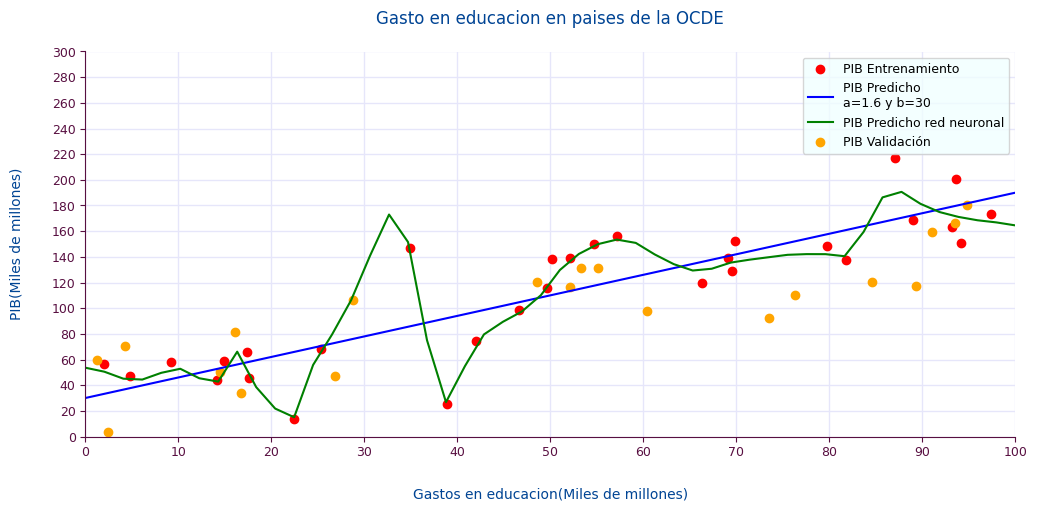

In [17]:
datos_val=get_datos_validacion()
x_val=datos_val[:, 0]
y_val=datos_val[:, 1]

fig_10=plt.figure(figsize=(12,5))
axes_10=fig_10.add_subplot(1,1,1)
axes_10.scatter(x,y, label='PIB Entrenamiento', color='red')
axes_10.plot(rango_gasto_edu,pib_modelo_correcto, label=f'PIB Predicho\na={a_modelo_correcto} y b={b_modelo_correcto}', color='blue')
#resultado de red neuronal
axes_10.plot(rango_gasto_edu,pib_modelo_red_neuronal, label=f'PIB Predicho red neuronal', color='green')
#Datos de validacion
axes_10.scatter(x_val, y_val, label='PIB Validación', color='orange')
customize_graf(axes=axes_10,title='Gasto en educacion en paises de la OCDE', xlabel='Gastos en educacion(Miles de millones)', ylabel='PIB(Miles de millones)', frontsize=9,xmajor_locator=10, ymajor_locator=20, xmax=100, ymax=300, legend=True)


In [19]:
def compile_fit_4_11(x,y,x_val,y_val,epochs):
    np.random.seed(5)
    tf.random.set_seed(5)
    random.seed(5)

    model=Sequential()
    model.add(Dense(1,activation="relu",input_dim=1))
    model.add(Dense(10,activation="relu"))
    model.add(Dense(100,activation="relu"))
    model.add(Dense(300,activation="relu"))
    model.add(Dense(600,activation="relu"))
    model.add(Dense(900,activation="relu"))
    model.add(Dense(1800,activation="relu"))
    model.add(Dense(900,activation="relu")) 
    model.add(Dense(600,activation="relu")) 
    model.add(Dense(300,activation="relu")) 
    model.add(Dense(200,activation="relu"))
    model.add(Dense(100,activation="relu"))
    model.add(Dense(10,activation="relu"))
    model.add(Dense(1,input_dim=1))
    model.compile(loss='mean_squared_error',optimizer="Adam")

    history=model.fit(x, y,validation_data=(x_val,y_val), verbose=False, epochs=epochs)

    return model,history

In [23]:
model,history=compile_fit_4_11(x,y,x_val,y_val, 10000)

c:\Users\shiku\Documents\IABD\PIA\redes_neuronales\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


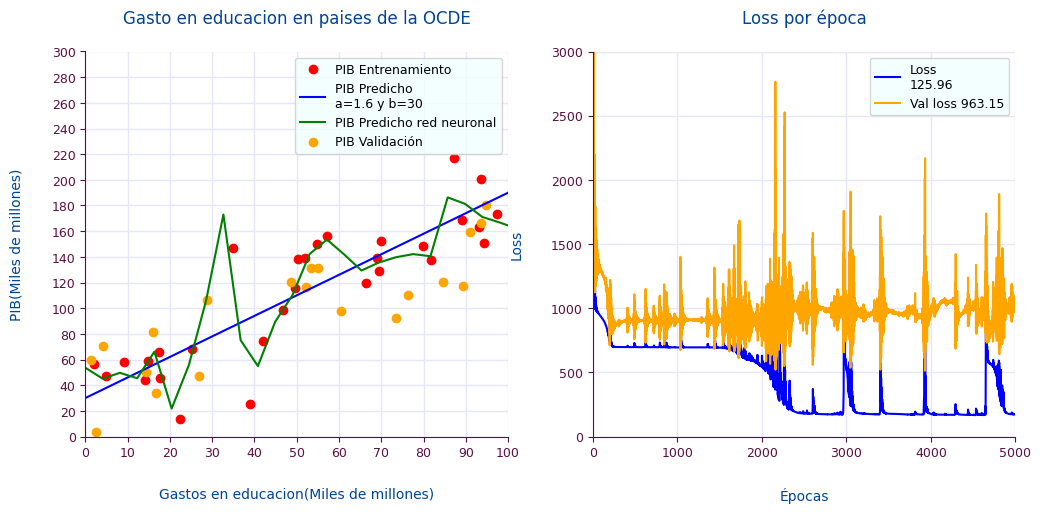

In [27]:
a_modelo_red_neuronal=model.layers[0].get_weights()[0][0,0]
b_modelo_red_neuronal=model.layers[0].get_weights()[1][0]

fig_11=plt.figure(figsize=(12,5))
axes_11=fig_11.add_subplot(1,2,1)
axes_11.scatter(x,y, label='PIB Entrenamiento', color='red')
axes_11.plot(rango_gasto_edu,pib_modelo_correcto, label=f'PIB Predicho\na={a_modelo_correcto} y b={b_modelo_correcto}', color='blue')
#resultado de red neuronal
axes_11.plot(rango_gasto_edu,pib_modelo_red_neuronal, label=f'PIB Predicho red neuronal', color='green')
#Datos de validacion
axes_11.scatter(x_val, y_val, label='PIB Validación', color='orange')
customize_graf(axes=axes_11,title='Gasto en educacion en paises de la OCDE', xlabel='Gastos en educacion(Miles de millones)', ylabel='PIB(Miles de millones)', frontsize=9,xmajor_locator=10, ymajor_locator=20, xmax=100, ymax=300, legend=True)

axes_11=fig_11.add_subplot(1,2,2)
axes_11.plot(history.history['loss'], label=f'Loss\n{history.history['loss'][-1]:.2f}', color='blue')
axes_11.plot(history.history['val_loss'], label=f'Val loss {history.history['val_loss'][-1]:.2f}', color='orange')
customize_graf(axes=axes_11,title='Loss por época', xlabel='Épocas', ylabel='Loss', frontsize=9,xmajor_locator=1000, ymajor_locator=500, xmax=5000, ymax=3000)


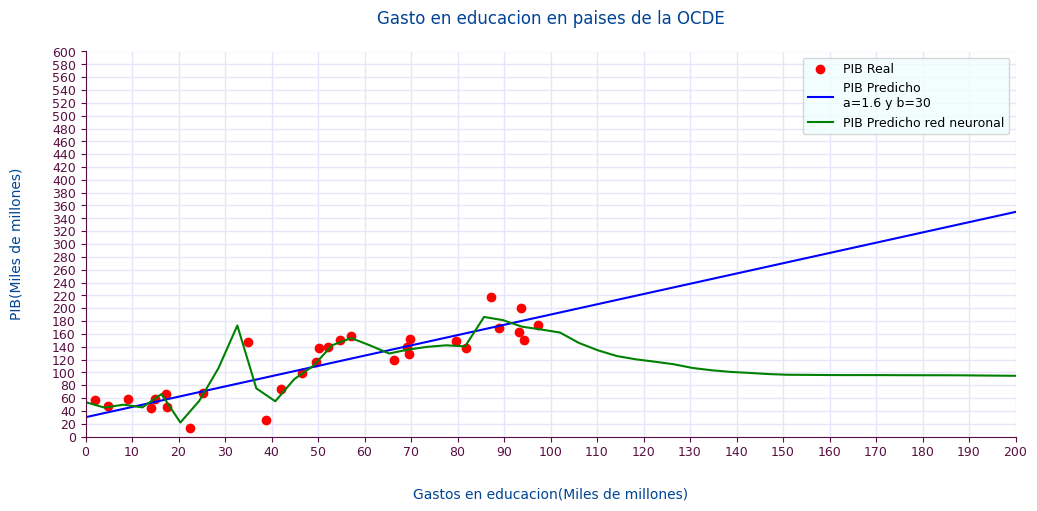

In [25]:
a_modelo_correcto=1.6
b_modelo_correcto=30

rango_gasto_edu=np.linspace(0, 200, 50)
pib_modelo_correcto=a_modelo_correcto*rango_gasto_edu+b_modelo_correcto

#Predict
pib_modelo_red_neuronal=model.predict(rango_gasto_edu.reshape(-1,1),verbose=False)

fig_12=plt.figure(figsize=(12,5))
axes_12=fig_12.add_subplot(1,1,1)
axes_12.scatter(x,y, label='PIB Real', color='red')
axes_12.plot(rango_gasto_edu,pib_modelo_correcto, label=f'PIB Predicho\na={a_modelo_correcto} y b={b_modelo_correcto}', color='blue')
#resultado de red neuronal
axes_12.plot(rango_gasto_edu,pib_modelo_red_neuronal, label=f'PIB Predicho red neuronal', color='green')
customize_graf(axes=axes_12,title='Gasto en educacion en paises de la OCDE', xlabel='Gastos en educacion(Miles de millones)', ylabel='PIB(Miles de millones)', frontsize=9,xmajor_locator=10, ymajor_locator=20, xmax=200, ymax=600)


In [28]:
np.random.seed(8)
def get_gastos_educacion(semana):
    num_predicciones_semanales=300
    gastos_educacion=np.random.uniform((semana/np.random.uniform(20,30)),30+(semana/np.random.uniform(5,20))-np.random.uniform(1,20),num_predicciones_semanales)
    gastos_educacion=gastos_educacion[gastos_educacion>1]
 
    return gastos_educacion

media=[]
desviacion=[]
for i in range(0,600):
    gastos=get_gastos_educacion(i)
    pib=model.predict(gastos.reshape(-1,1),verbose=False)
    media_pib=pib.mean()
    desviacion_pib=np.std(pib, ddof=1)  # Muestra
    desv=float(desviacion_pib)
    media.append(media_pib)
    desviacion.append(desviacion_pib)
    
print(media)
print(desviacion)

[47.881386, 47.52316, 49.26123, 48.617523, 48.377037, 48.17957, 49.49131, 48.152092, 45.04814, 47.99748, 45.437183, 42.33122, 44.347958, 44.54163, 42.95995, 48.795082, 48.8086, 51.570633, 48.828293, 48.41103, 50.34673, 45.731476, 49.806957, 53.046703, 48.746914, 44.18133, 46.04894, 49.931667, 49.461784, 48.49136, 45.76111, 49.83286, 47.717968, 47.49452, 51.865116, 43.03933, 48.650547, 43.913723, 58.068542, 47.089664, 46.340103, 43.73972, 49.38712, 47.179825, 49.697605, 47.955566, 44.027554, 60.08577, 43.432774, 47.261387, 49.879303, 47.847427, 45.142345, 53.862427, 45.27513, 47.901337, 53.80257, 49.9886, 47.770317, 70.24332, 47.69861, 70.879684, 64.99305, 48.23208, 48.842953, 49.775356, 43.7527, 46.708405, 48.649113, 49.72015, 45.522392, 44.165493, 63.989845, 74.1284, 67.297554, 65.01622, 47.193848, 53.541317, 42.434536, 49.63666, 43.31329, 71.05469, 47.579796, 47.599133, 48.535793, 70.710236, 66.96925, 46.34354, 70.86621, 49.35746, 47.589012, 63.024467, 43.4583, 44.283367, 52.299297, 

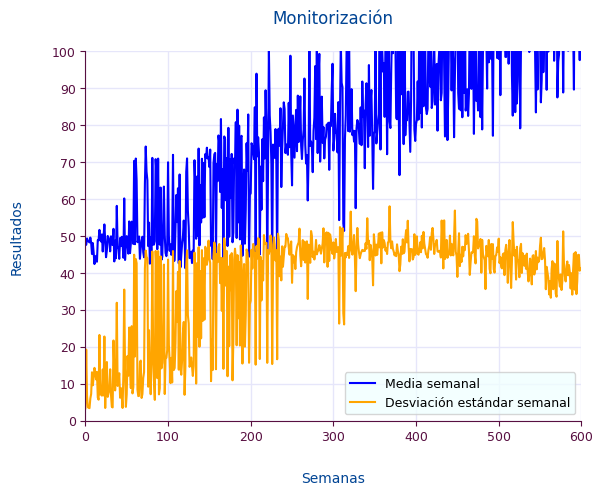

In [29]:
fig_13=plt.figure()
axes_13=fig_13.add_subplot(1,1,1)
axes_13.plot(media,label='Media semanal', color='blue')
axes_13.plot(desviacion,label='Desviación estándar semanal', color='orange')
customize_graf(axes=axes_13,title='Monitorización', xlabel='Semanas', ylabel='Resultados', frontsize=9,xmajor_locator=100, ymajor_locator=10, xmax=600, ymax=100)


c:\Users\shiku\Documents\IABD\PIA\redes_neuronales\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  Nombre Red  Capas                               Épocas  Activación      MSE Entrenamiento    R² Entrenamiento    Tiempo Entrenamiento    MSE Validación    R² Validación
------------  --------------------------------  --------  ------------  -------------------  ------------------  ----------------------  ----------------  ---------------
           1  [20, 1]                                100  relu                      35.2324         0.59444                     8.96144           29.0482        0.60389
           2  [20, 1]                                100  selu                      32.9171         0.621091                    8.63912           27.9898        0.618323
           3  [20, 1]                                100  tanh                      71.544          0.176457                    8.92885           63.4029        0.135421
           4  [20, 10, 1]                            100  relu                      30.9678         0.64353                     8.91294           29.

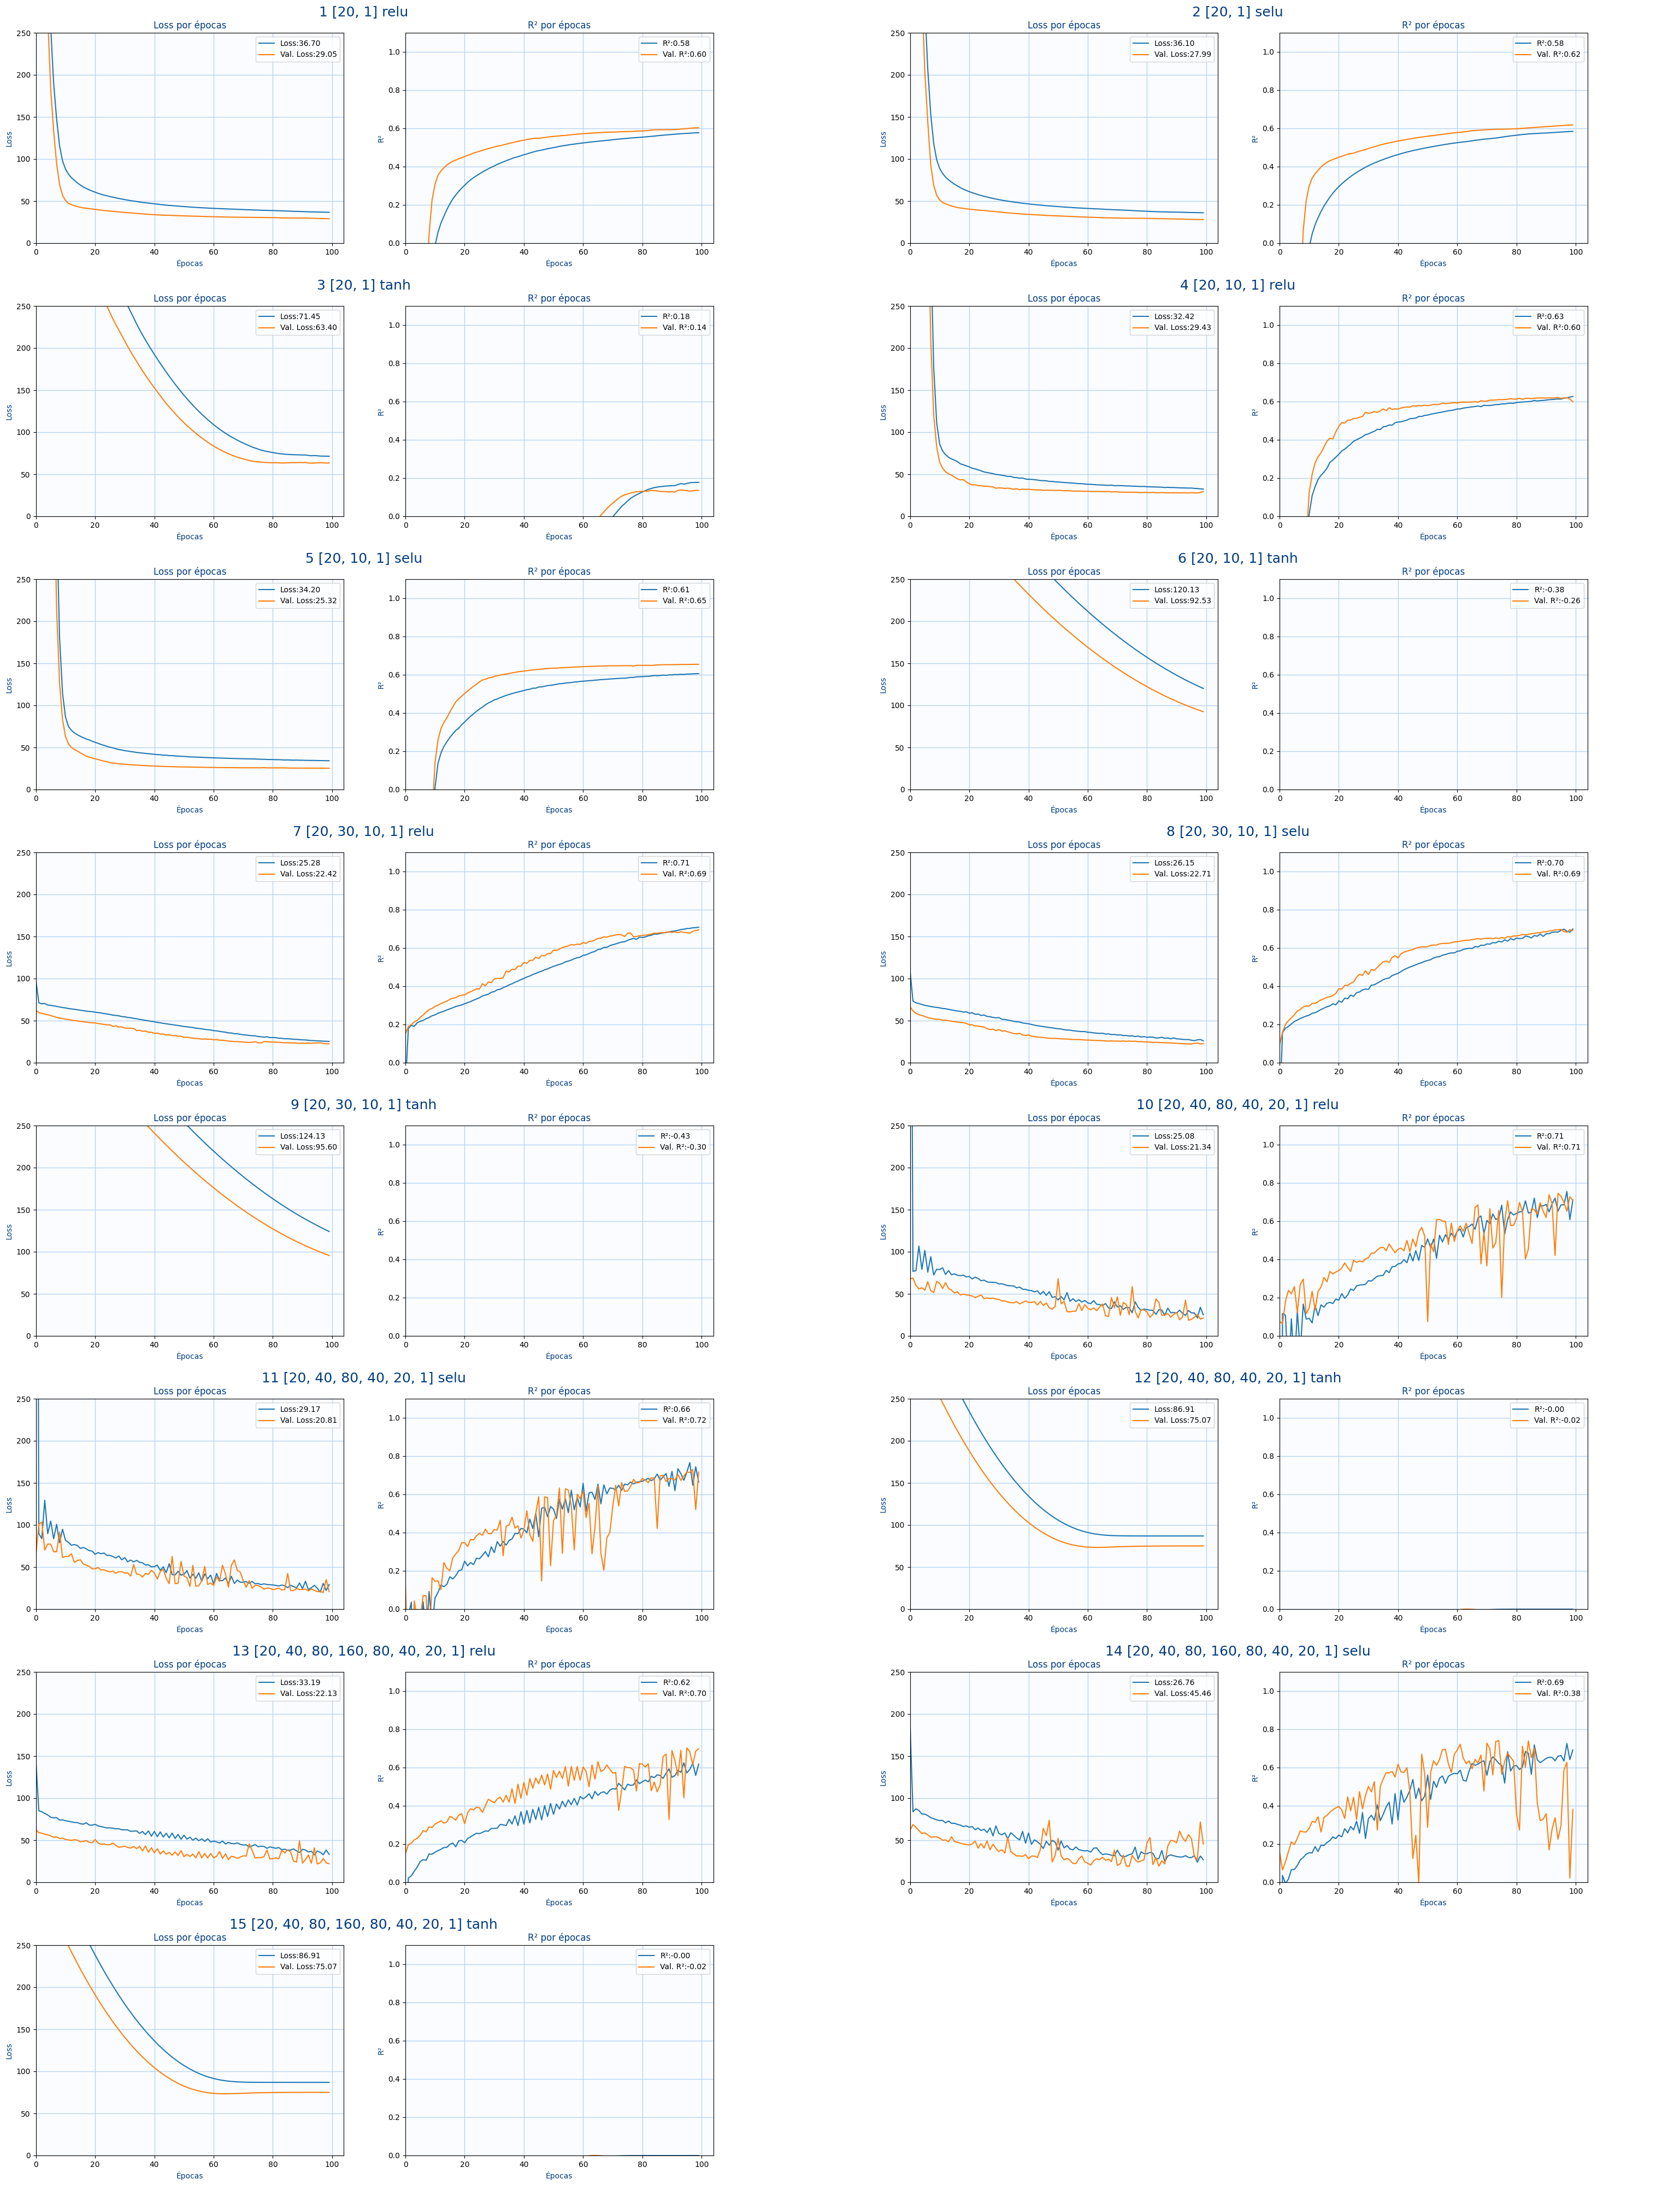

In [ ]:
#Paso 14
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import math
import random
from tabulate import tabulate

def axes_configure_for_metrics(axes,title,xlabel,ylabel,max_x=1,max_y=1.1,step_x=0.1,step_y=0.1,legend=True):
    axes.set_title(title,color="#003B80")
    axes.set_xlabel(xlabel, color="#003B80")
    axes.set_ylabel(ylabel, color="#003B80")

    if max_x is not None:
        axes.set_xlim(xmin=0,xmax=max_x)
    else:
        axes.set_xlim(xmin=0)
    if max_y is not None:
        axes.set_ylim(ymin=0,ymax=max_y)    
    else:
        axes.set_ylim(ymin=0)
    
    if step_x is not None:
        axes.xaxis.set_major_locator(MultipleLocator(step_x))
    if step_y is not None:
        axes.yaxis.set_major_locator(MultipleLocator(step_y))
    
    axes.grid(visible=True, which='major', axis='both',color="#BAD4F2",linewidth=1,zorder=-10)
    axes.set_axisbelow(True)
    axes.set_facecolor("#FAFCFF")
    
    if (legend):
        axes.legend()


def compile_fit(capas,x,y,x_validacion,y_entrenamiento,epochs,activation):
    np.random.seed(5)
    tf.random.set_seed(5)
    random.seed(5)

    model=Sequential()
    for index,neuronas_capa in enumerate(capas):
        if (index==0):
            model.add(Dense(neuronas_capa, activation=activation,input_dim=x.shape[1]))
        elif (index==len(capas)-1):
            model.add(Dense(neuronas_capa, activation='linear'))
        else:
            model.add(Dense(neuronas_capa, activation=activation))
    model.compile(loss='mean_squared_error',metrics=[tf.keras.metrics.R2Score()])

    tiempo_entrenamiento = perf_counter()
    history=model.fit(x, y,epochs=epochs,verbose=False,validation_data=(x_validacion,y_entrenamiento))
    tiempo_entrenamiento=perf_counter()-tiempo_entrenamiento

    return model,history,tiempo_entrenamiento

def get_datos():
    boston=fetch_openml(name="boston",version=1)
    x=np.array(boston.data).astype(np.float32)
    y=np.array(boston.target).astype(np.float32)

    x_entrenamiento, x_validacion, y_entrenamiento, y_validacion = train_test_split(x, y, test_size=0.2, random_state=42)

    return x_entrenamiento, y_entrenamiento.reshape(-1,1), x_validacion, y_validacion.reshape(-1,1)


x_entrenamiento, y_entrenamiento, x_validacion, y_validacion=get_datos()


redes_neuronales=[
    [[20,1],"relu"],
    [[20,1],"selu"],
    [[20,1],"tanh"],
    [[20,10,1],"relu"],
    [[20,10,1],"selu"],
    [[20,10,1],"tanh"],
    [[20,30,10,1],"relu"],
    [[20,30,10,1],"selu"],
    [[20,30,10,1],"tanh"],
    [[20,40,80,40,20,1],"relu"],
    [[20,40,80,40,20,1],"selu"],
    [[20,40,80,40,20,1],"tanh"],
    [[20,40,80,160,80,40,20,1],"relu"],
    [[20,40,80,160,80,40,20,1],"selu"],
    [[20,40,80,160,80,40,20,1],"tanh"]                            
]

epochs=150

resultados=[]

nrows=len(redes_neuronales)
figure=plt.figure(figsize=(4*8,5*math.ceil(nrows/2)))
subfigures = figure.subfigures(nrows=math.ceil(nrows/2), ncols=2).reshape(-1)

for index,(capas,activacion) in enumerate(redes_neuronales):

    model,history,tiempo_entrenamiento=compile_fit(capas,x_entrenamiento,y_entrenamiento, x_validacion, y_validacion,epochs,activacion)
    mse_entrenamiento,coeficiente_determinacion_entrenamiento=get_metricas_modelo(model,x_entrenamiento,y_entrenamiento)
    mse_validacion,coeficiente_determinacion_validacion=get_metricas_modelo(model,x_validacion,y_validacion)   

    resultado=[str(index+1),str(capas),epochs,activacion,mse_entrenamiento,coeficiente_determinacion_entrenamiento,tiempo_entrenamiento,mse_validacion,coeficiente_determinacion_validacion]
    resultados.append(resultado)

    subfigure=subfigures[index]
    subfigure.suptitle(str(index+1)+" "+str(capas)+" "+activacion,fontsize=18, color="#003B80")

    axes = subfigure.add_subplot(1,2,1)
    axes.plot(history.history['loss'],label=f"Loss:{history.history['loss'][-1]:.2f}")
    axes.plot(history.history['val_loss'],label=f"Val. Loss:{history.history['val_loss'][-1]:.2f}")            
    axes_configure_for_metrics(axes,"Loss por épocas","Épocas","Loss",None,250,None,None)

    axes = subfigure.add_subplot(1,2,2)
    axes.plot(history.history['r2_score'],label=f"R²:{history.history['r2_score'][-1]:.2f}")
    axes.plot(history.history['val_r2_score'],label=f"Val. R²:{history.history['val_r2_score'][-1]:.2f}")      
    axes_configure_for_metrics(axes,"R² por épocas","Épocas","R²",None,1.1,None,None)


print(tabulate(resultados,headers=["Nombre Red","Capas","Épocas","Activación","MSE Entrenamiento","R² Entrenamiento","Tiempo Entrenamiento","MSE Validación","R² Validación"]))
name=f'boston_loss_metrics_{epochs}_epocas.png'
save_figure(figure,name)

c:\Users\shiku\Documents\IABD\PIA\redes_neuronales\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  Nombre Red  Capas                               Épocas  Activación      MSE Entrenamiento    R² Entrenamiento    Tiempo Entrenamiento    MSE Validación    R² Validación
------------  --------------------------------  --------  ------------  -------------------  ------------------  ----------------------  ----------------  ---------------
           1  [20, 1]                                 10  relu                      86.1319         0.00853509                  1.52833           56.7836         0.225683
           2  [20, 1]                                 10  selu                      86.8242         0.000567079                 1.47169           56.9691         0.223153
           3  [20, 1]                                 10  tanh                     444.166         -4.1128                      1.39221          383.485         -4.22931
           4  [20, 10, 1]                             10  relu                      93.3557        -0.0746181                   1.51882           

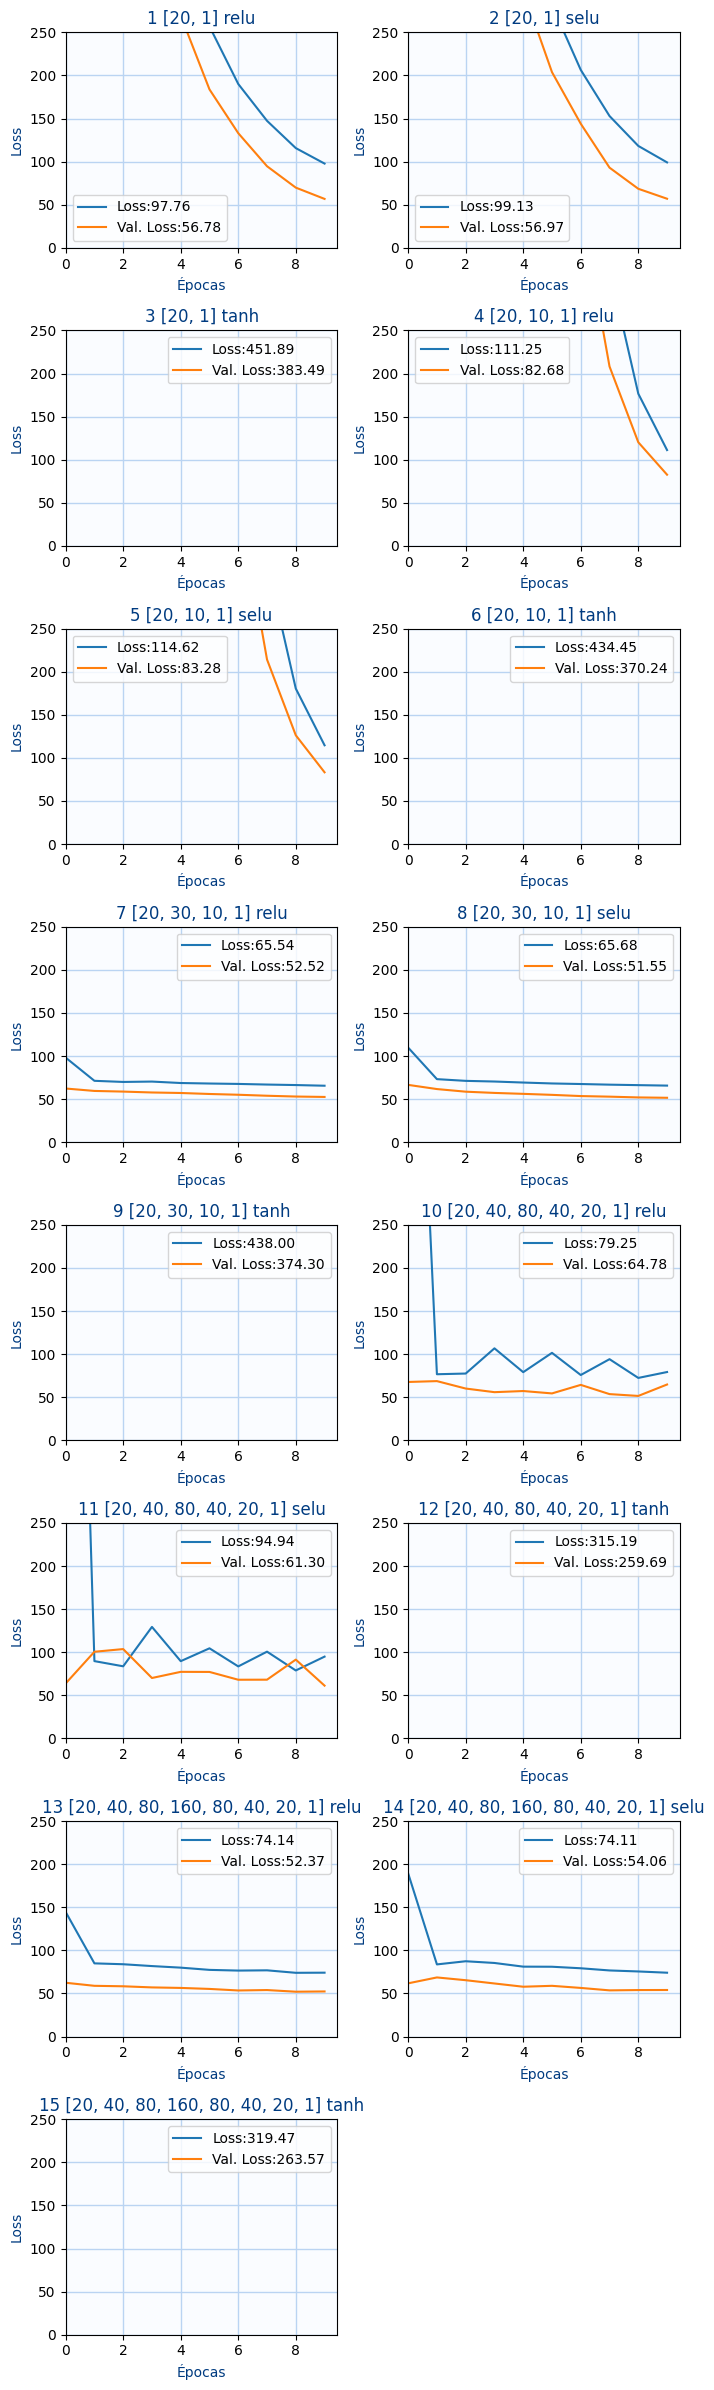

In [28]:
def compile_fit(capas,x,y,x_validacion,y_entrenamiento,epochs,activation):
    np.random.seed(5)
    tf.random.set_seed(5)
    random.seed(5)

    model=Sequential()
    for index,neuronas_capa in enumerate(capas):
        if (index==0):
            model.add(Dense(neuronas_capa, activation=activation,input_dim=x.shape[1]))
        elif (index==len(capas)-1):
            model.add(Dense(neuronas_capa, activation='linear'))
        else:
            model.add(Dense(neuronas_capa, activation=activation))
    model.compile(loss='mean_squared_error',metrics=[tf.keras.metrics.R2Score()])

    tiempo_entrenamiento = perf_counter()
    history=model.fit(x, y,epochs=epochs,verbose=False,validation_data=(x_validacion,y_entrenamiento))
    tiempo_entrenamiento=perf_counter()-tiempo_entrenamiento

    return model,history,tiempo_entrenamiento

redes_neuronales=[
    [[20,1],"relu"],
    [[20,1],"selu"],
    [[20,1],"tanh"],
    [[20,10,1],"relu"],
    [[20,10,1],"selu"],
    [[20,10,1],"tanh"],
    [[20,30,10,1],"relu"],
    [[20,30,10,1],"selu"],
    [[20,30,10,1],"tanh"],
    [[20,40,80,40,20,1],"relu"],
    [[20,40,80,40,20,1],"selu"],
    [[20,40,80,40,20,1],"tanh"],
    [[20,40,80,160,80,40,20,1],"relu"],
    [[20,40,80,160,80,40,20,1],"selu"],
    [[20,40,80,160,80,40,20,1],"tanh"]                            
]
epochs=10

resultados=[]

ncols=2
nrows=math.ceil(len(redes_neuronales)/ncols)
figure=plt.figure(figsize=(3.5*ncols,3*nrows))

for index,(capas,activacion) in enumerate(redes_neuronales):

    model,history,tiempo_entrenamiento=compile_fit(capas,x_entrenamiento,y_entrenamiento, x_validacion, y_validacion,epochs,activacion)
    mse_entrenamiento,coeficiente_determinacion_entrenamiento=get_metricas_modelo(model,x_entrenamiento,y_entrenamiento)
    mse_validacion,coeficiente_determinacion_validacion=get_metricas_modelo(model,x_validacion,y_validacion)
    
    resultado=[str(index+1),str(capas),epochs,activacion,mse_entrenamiento,coeficiente_determinacion_entrenamiento,tiempo_entrenamiento,mse_validacion,coeficiente_determinacion_validacion]
    resultados.append(resultado)


    axes = figure.add_subplot(nrows,ncols,index+1)
    axes.plot(history.history['loss'],label=f"Loss:{history.history['loss'][-1]:.2f}")
    axes.plot(history.history['val_loss'],label=f"Val. Loss:{history.history['val_loss'][-1]:.2f}")
    axes_configure_for_metrics(axes,str(index+1)+" "+str(capas)+" "+activacion,"Épocas","Loss",None,250,None,None)


figure.tight_layout()

print(tabulate(resultados,headers=["Nombre Red","Capas","Épocas","Activación","MSE Entrenamiento","R² Entrenamiento","Tiempo Entrenamiento","MSE Validación","R² Validación"]))

save_figure(figure,"boston_loss_metrics_10_epocas.png")

